In [44]:
import pandas as pd
import numpy as np
import os 
import matplotlib as plt
from matplotlib.pyplot import boxplot
from sklearn.linear_model import LogisticRegression

In [24]:
current_directory = os.getcwd()
print(current_directory)

C:\Users\briel\Downloads


In [26]:
new_directory_path = r'C:\Users\briel\Downloads'
os.chdir(new_directory_path)

In [27]:
updated_dir = os.getcwd()
print(updated_dir)

C:\Users\briel\Downloads


In [28]:
file_path = "C:\\Users\\briel\\Downloads\\Week14Assignment.txt"

try:
    with open(file_path, "r") as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except IOError:
    print("An error occured while reading the file.")

PatientID, Readmission, StaffSatisfaction, CleanlinessSatisfaction, FoodSatisfaction, ComfortSatisfaction, CommunicationSatisfaction
101, 1, 4, 5, 3, 4, 5
102, 0, 3, 2, 4, 2, 3
103, 1, 5, 4, 5, 4, 4
104, 0, 5, 3, 5, 4, 5
105, 1, 4, 5, 3, 4, 4
106, 1, 2, 3, 2, 3, 3
107, 0, 3, 2, 3, 4, 3
108, 0, 5, 5, 4, 5, 5
109, 1, 4, 4, 4, 4, 4
110, 0, 3, 3, 3, 4, 3
111, 1, 4, 5, 4, 4, 5
112, 0, 2, 3, 2, 3, 2
113, 1, 3, 4, 3, 4, 3
114, 1, 3, 3, 3, 2, 3
115, 0, 5, 4, 5, 5, 5
116, 1, 4, 3, 4, 4, 4
117, 0, 2, 2, 2, 3, 3
118, 0, 5, 5, 4, 4, 5
119, 1, 4, 4, 4, 4, 4
120, 0, 3, 3, 3, 4, 3
121, 1, 4, 5, 5, 4, 4
122, 1, 3, 4, 4, 4, 3
123, 0, 4, 3, 4, 3, 4
124, 0, 2, 2, 2, 3, 3
125, 1, 3, 4, 3, 4, 3
126, 0, 4, 5, 5, 5, 5
127, 1, 3, 4, 4, 4, 3
128, 0, 4, 3, 4, 3, 4
129, 0, 2, 2, 2, 3, 3
130, 1, 3, 4, 3, 4, 3


In [29]:
filepath = 'Week14Assignment.txt'
df = pd.read_csv(filepath)

In [30]:
df = pd.read_csv(file_path)

In [66]:
print(df)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
5         106             1                   2                         3   
6         107             0                   3                         2   
7         108             0                   5                         5   
8         109             1                   4                         4   
9         110             0                   3                         3   
10        111             1                   4                         5   
11        112             0                   2                         3   

In [54]:
print(df.columns)

Index(['PatientID', ' Readmission', ' StaffSatisfaction',
       ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction',
       ' CommunicationSatisfaction', 'OverallSatisfaction'],
      dtype='object')


In [38]:
# Calculating Statistics
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_cleanliness = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_food = np.mean(df[' FoodSatisfaction'])
satisfaction_comfort = np.mean(df[' ComfortSatisfaction'])
satisfaction_communication = np.mean(df[' CommunicationSatisfaction'])

In [39]:
print(f"Number of patients readmitted: {num_readmitted}.")
print(f"Average staff satisfaction: {satisfaction_staff}.")
print(f"Average cleanliness satisfaction: {satisfaction_cleanliness}.")
print(f"Average food satisfaction: {satisfaction_food}.")
print(f"Average comfort satisfaction: {satisfaction_comfort}.")
print(f"Average communication satisfaction: {satisfaction_communication}.")

Number of patients readmitted: 15.
Average staff satisfaction: 3.5.
Average cleanliness satisfaction: 3.6.
Average food satisfaction: 3.533333333333333.
Average comfort satisfaction: 3.7333333333333334.
Average communication satisfaction: 3.7.


{'whiskers': [<matplotlib.lines.Line2D at 0x185377b72d0>,
 'caps': [<matplotlib.lines.Line2D at 0x185376cfb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x185376cec10>],
 'medians': [<matplotlib.lines.Line2D at 0x185376b3a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x185376b0c50>],
 'means': []}

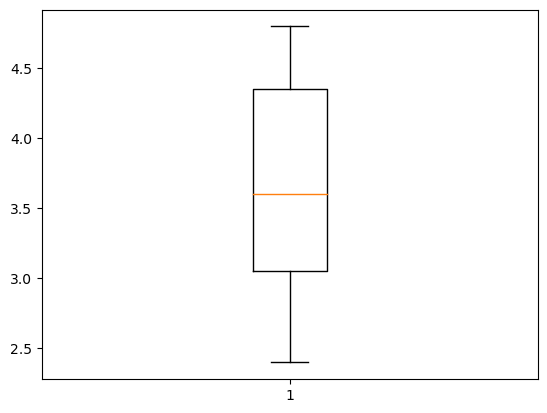

In [47]:
# Calculate overall satisfaction
df['OverallSatisfaction'] = df[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction', ' CommunicationSatisfaction']].mean(axis=1)

boxplot(df['OverallSatisfaction'], showfliers=True)

In [58]:
# Logistic Regression
X = df['OverallSatisfaction'].values.reshape(-1, 1)
Y = df[' Readmission']

log_reg = LogisticRegression().fit(X, Y)

In [68]:
# Correlation Results
correlation_coefficient = log_reg.coef_[0][0]

if correlation_coefficient > 0:
    print("Logistic Regression results indicated a: ")
    if correlation_coefficient > 0.5:
        print("Moderate correlation")
    elif correlation_coefficient > 0.7:
        print("Strong correlation")
    else:
        print("Weak correlation")
else:
    print("Logistic regression results indicated: ")
    print("No correlation")
    
print(f"The correlation coefficient was {correlation_coefficient}")


Logistic Regression results indicated a: 
Weak correlation
The correlation coefficient was 0.3362278182798735


(2.0, 5.0)

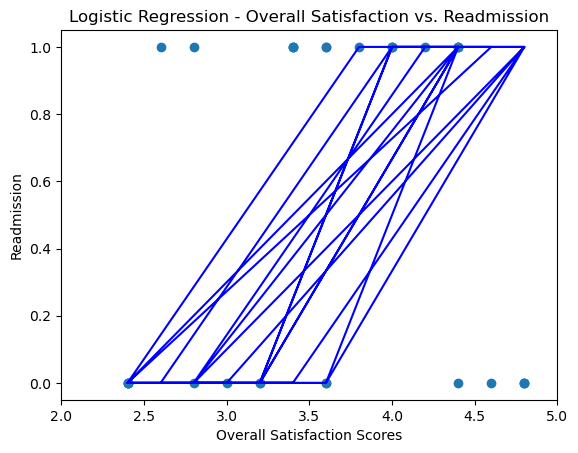

In [64]:
# Plot the data
plt.pyplot.scatter(X, Y)
plt.pyplot.xlabel('Overall Satisfaction Scores')
plt.pyplot.ylabel('Readmission')
plt.pyplot.title('Logistic Regression - Overall Satisfaction vs. Readmission')
plt.pyplot.plot(X, log_reg.predict(X), color = 'blue')
plt.pyplot.xlim(2, 5)

